# Import Packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from sklearn import tree
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,roc_auc_score



<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
data=pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
data.shape

(45211, 17)

# Exploratory Data Analysis

In [6]:
data.dtypes.to_frame('Data Types')

,Data Types
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Checking the missing values

In [8]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


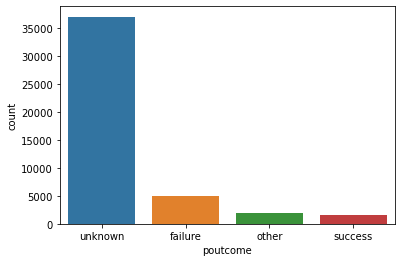

In [10]:
sns.countplot(data['poutcome'])

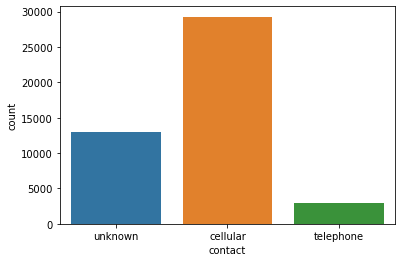

In [11]:
sns.countplot(data['contact'])

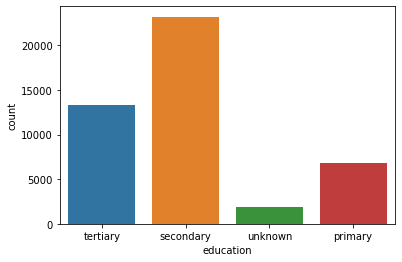

In [12]:
sns.countplot(data['education'])

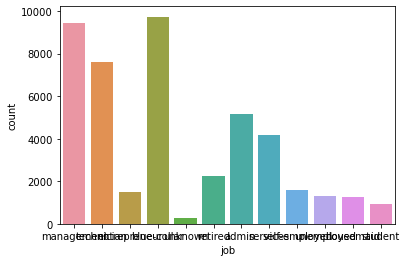

In [14]:
sns.countplot(data['job'])

In [15]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [16]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# 5 Point Summary understanding

1. Outliers are present in age,balance,duration,campaign,pdays,previous columns

2. balance,duration,campaign,pdays,previous are right skewed
 

# Distribution of Numerical features

C:\Users\govindaraj.venugopal\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\govindaraj.venugopal\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
<ipython-input-17-a0a62e25470a>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


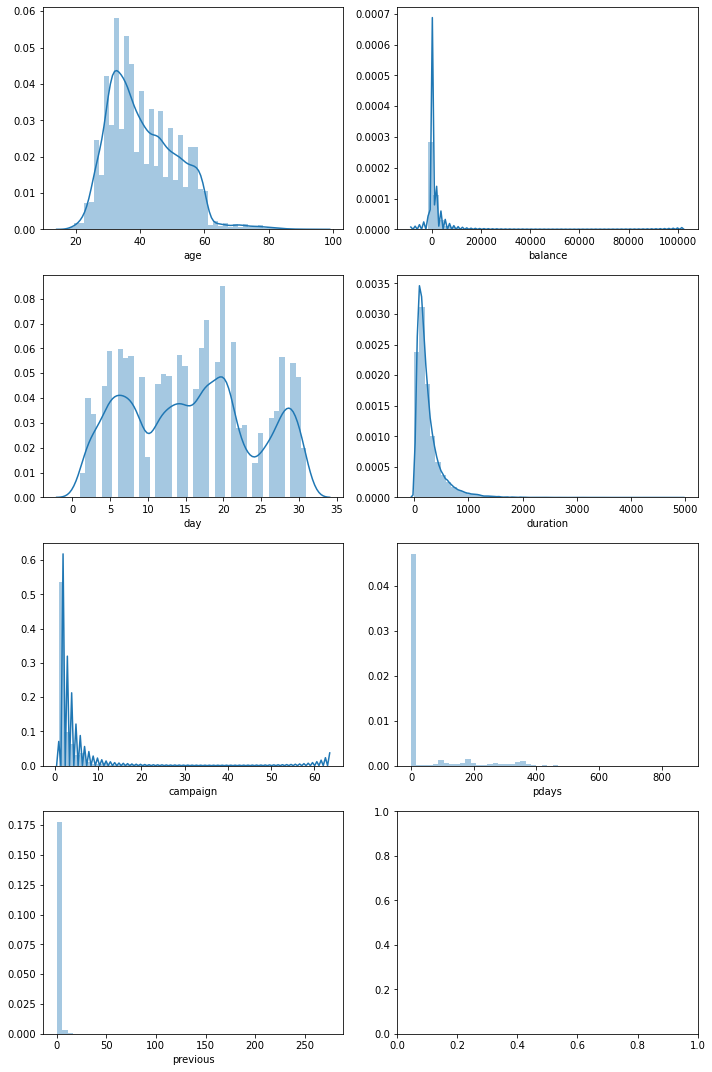

In [17]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.distplot(data['age'],ax=axe[0])
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
sns.distplot(data['pdays'],ax=axe[5])
sns.distplot(data['previous'],ax=axe[6])

fig.tight_layout()
fig.show()


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Distribution of Categorical features

<ipython-input-21-8c3743eee67a>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


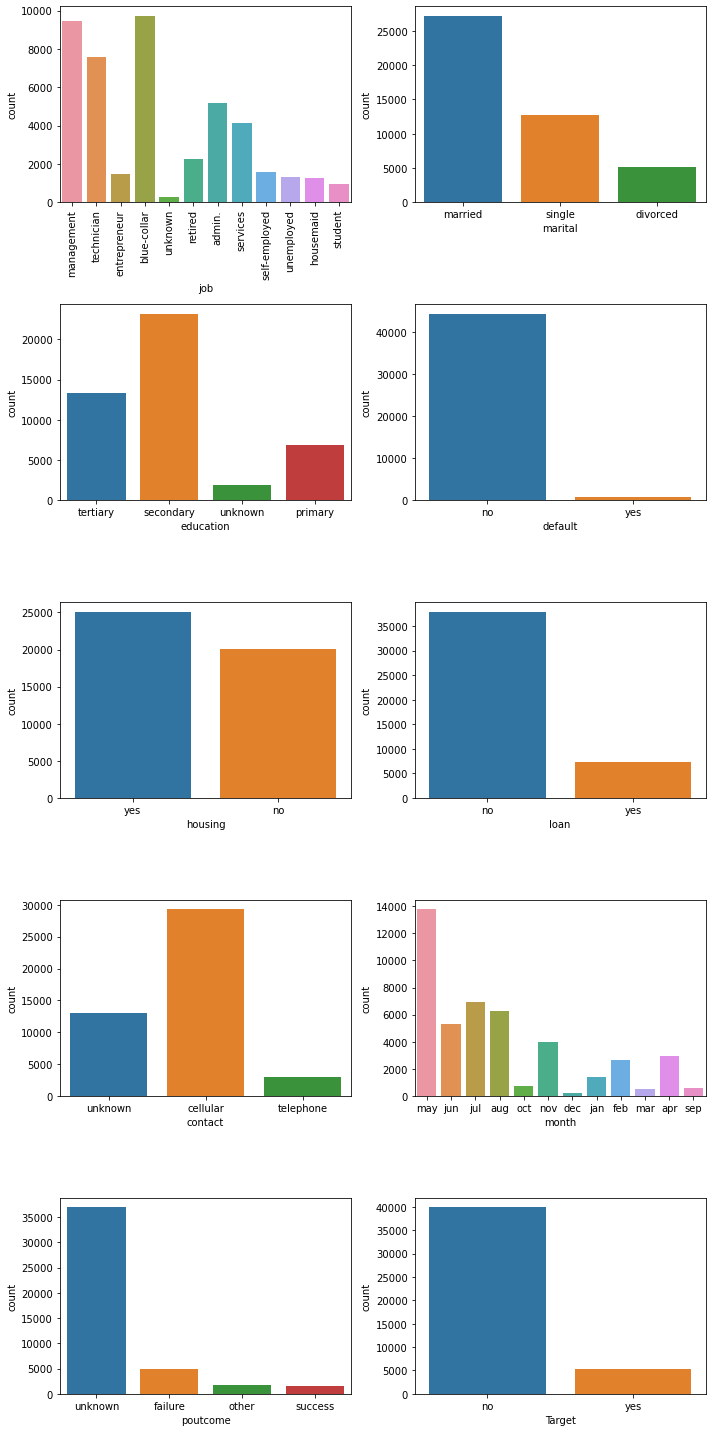

In [21]:
fig,axe=plt.subplots(nrows=5,ncols=2,figsize=(10,20))
axe=axe.flatten()
plot=sns.countplot(x=data['job'],data=data,ax=axe[0])
plt.setp(plot.get_xticklabels(),rotation=90)
sns.countplot(x=data['marital'],data=data,ax=axe[1])

sns.countplot(x=data['education'],data=data,ax=axe[2])
sns.countplot(x=data['default'],data=data,ax=axe[3])
sns.countplot(x=data['housing'],data=data,ax=axe[4])
sns.countplot(x=data['loan'],data=data,ax=axe[5])
sns.countplot(x=data['contact'],data=data,ax=axe[6])
sns.countplot(x=data['month'],data=data,ax=axe[7])
sns.countplot(x=data['poutcome'],data=data,ax=axe[8])
sns.countplot(x=data['Target'],data=data,ax=axe[9])

fig.tight_layout()
fig.show()

# Measure the skewness of numerical feature

In [23]:
data.skew().to_frame('Skewness').T

,age,balance,day,duration,campaign,pdays,previous
Skewness,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


# Checking the Outliers

<ipython-input-28-3d28739a9194>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


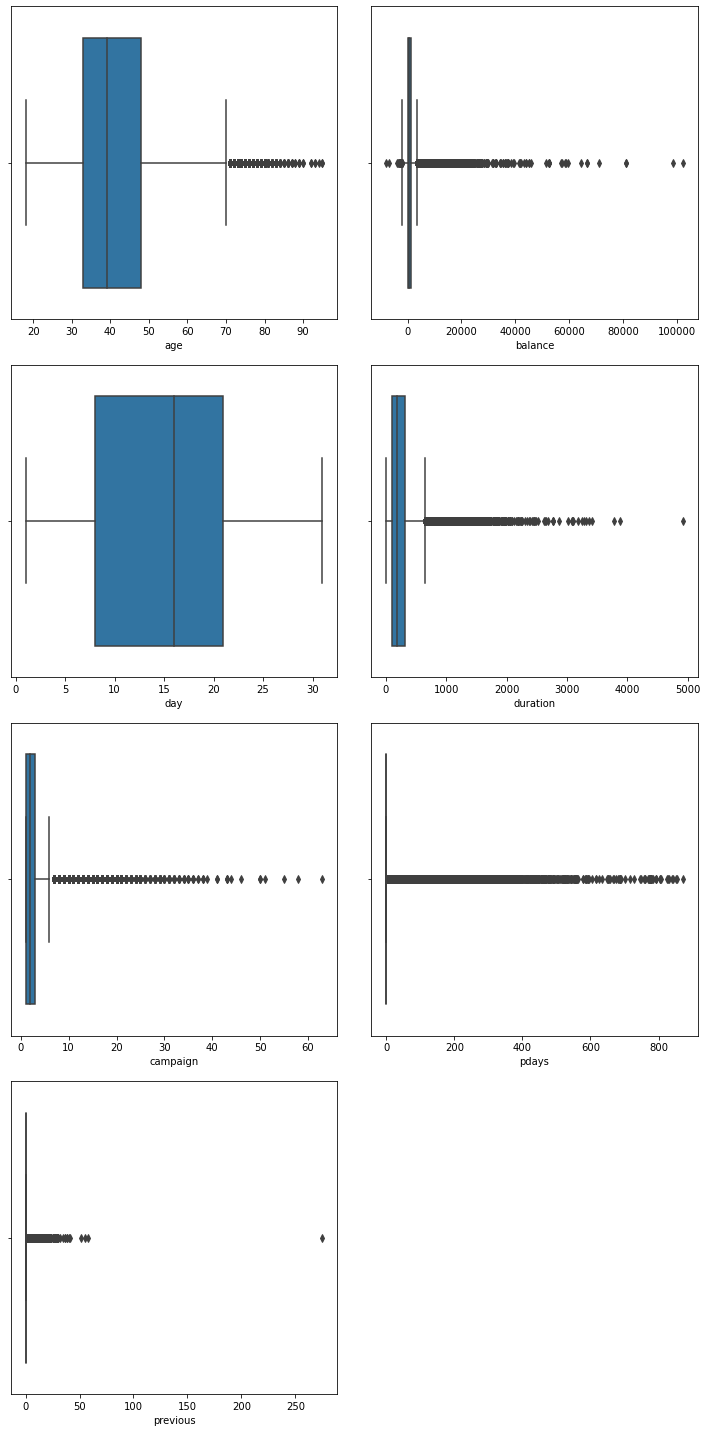

In [28]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,20))
axe=axe.flatten()
sns.boxplot(x='age',data=data,ax=axe[0])
sns.boxplot(x='balance',data=data,ax=axe[1])
sns.boxplot(x='day',data=data,ax=axe[2])
sns.boxplot(x='duration',data=data,ax=axe[3])
sns.boxplot(x='campaign',data=data,ax=axe[4])
sns.boxplot(x='pdays',data=data,ax=axe[5])
sns.boxplot(data['previous'],ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

# Label Encoding for string feature

In [29]:
from sklearn.preprocessing import LabelEncoder
df=data.copy()
encoder=LabelEncoder()

df['default']=encoder.fit_transform(df['default']).astype('int')

df['marital']=encoder.fit_transform(df['marital']).astype('int')
df['loan']=encoder.fit_transform(df['loan']).astype('int')
df['housing']=encoder.fit_transform(df['housing']).astype('int')
df['Target']=encoder.fit_transform(df['Target']).astype('int')
df['month']=encoder.fit_transform(df['month']).astype('int')
df['poutcome']=encoder.fit_transform(df['poutcome']).astype('int')
df['education']=encoder.fit_transform(df['education']).astype('int')

df['job']=encoder.fit_transform(df['job']).astype('int')
df['contact']=encoder.fit_transform(df['contact']).astype('int')


df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0


In [32]:
df['job']=encoder.fit_transform(df['job']).astype('int')
df['contact']=encoder.fit_transform(df['contact']).astype('int')


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  Target     45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


# Build the Base classification ML Model

In [31]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0


In [34]:
x=df.drop('Target',axis=1)
y=df['Target']

In [36]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


# Split the Records

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=3)

# Scale the data

In [38]:
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.fit_transform(xtest)

# Logistic Regression Model

In [40]:
log_reg=LogisticRegression(solver='liblinear')
log_reg.fit(xtrain,ytrain)
ypred=log_reg.predict(xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred))
print('\n The Classification Report \n',classification_report(ytest,ypred))


The Accuracy score
 0.893320554408729

 The Confusion matrix 
 [[11763   206]
 [ 1241   354]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.63      0.22      0.33      1595

    accuracy                           0.89     13564
   macro avg       0.77      0.60      0.64     13564
weighted avg       0.87      0.89      0.87     13564



# Naive Bayes

In [42]:
naive=GaussianNB()
naive.fit(xtrain,ytrain)
ypred_naive=naive.predict(xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_naive))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_naive))
print('\n The Classification Report \n',classification_report(ytest,ypred_naive))


The Accuracy score
 0.8452521380123857

 The Confusion matrix 
 [[10732  1237]
 [  862   733]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91     11969
           1       0.37      0.46      0.41      1595

    accuracy                           0.85     13564
   macro avg       0.65      0.68      0.66     13564
weighted avg       0.86      0.85      0.85     13564



# SVC

In [43]:
svc=SVC()
svc.fit(xtrain,ytrain)
ypred_svc=svc.predict(xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_svc))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_svc))
print('\n The Classification Report \n',classification_report(ytest,ypred_svc))


The Accuracy score
 0.8827042170451195

 The Confusion matrix 
 [[11965     4]
 [ 1587     8]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.67      0.01      0.01      1595

    accuracy                           0.88     13564
   macro avg       0.77      0.50      0.47     13564
weighted avg       0.86      0.88      0.83     13564



In [44]:
dtree=DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)
ypred_dtree=dtree.predict(xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_dtree))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_dtree))
print('\n The Classification Report \n',classification_report(ytest,ypred_dtree))


The Accuracy score
 0.8713506340312592

 The Confusion matrix 
 [[11075   894]
 [  851   744]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11969
           1       0.45      0.47      0.46      1595

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564



# Ensemble Techniques

# 1. Bagging Classifier

In [45]:
bagc=BaggingClassifier(base_estimator=dtree,n_estimators=200,random_state=1)
bagc.fit(xtrain,ytrain)
ypred_bagc=bagc.predict(xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_bagc))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_bagc))
print('\n The Classification Report \n',classification_report(ytest,ypred_bagc))


The Accuracy score
 0.9057800058979653

 The Confusion matrix 
 [[11533   436]
 [  842   753]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     11969
           1       0.63      0.47      0.54      1595

    accuracy                           0.91     13564
   macro avg       0.78      0.72      0.74     13564
weighted avg       0.90      0.91      0.90     13564



# Randomforest

In [46]:
randf=RandomForestClassifier(n_estimators=200,random_state=2,max_features=4)
randf.fit(xtrain,ytrain)
ypred_rand=randf.predict(xtest)

print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_rand))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_rand))
print('\n The Classification Report \n',classification_report(ytest,ypred_rand))


The Accuracy score
 0.9071070480684164

 The Confusion matrix 
 [[11613   356]
 [  904   691]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11969
           1       0.66      0.43      0.52      1595

    accuracy                           0.91     13564
   macro avg       0.79      0.70      0.74     13564
weighted avg       0.90      0.91      0.90     13564



# Adaboost

In [47]:
adab=AdaBoostClassifier(n_estimators=200,random_state=2)
adab.fit(xtrain,ytrain)
ypred_ada=adab.predict(xtest)

print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_ada))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_ada))
print('\n The Classification Report \n',classification_report(ytest,ypred_ada))


The Accuracy score
 0.9019463285166618

 The Confusion matrix 
 [[11636   333]
 [  997   598]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.64      0.37      0.47      1595

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



# Gradient Boosting

In [48]:
gb=GradientBoostingClassifier(n_estimators=200,random_state=2)
gb.fit(xtrain,ytrain)
ypred_gb=gb.predict(xtest)

print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_gb))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_gb))
print('\n The Classification Report \n',classification_report(ytest,ypred_gb))


The Accuracy score
 0.9048215865526393

 The Confusion matrix 
 [[11628   341]
 [  950   645]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.65      0.40      0.50      1595

    accuracy                           0.90     13564
   macro avg       0.79      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564

